# Using artificial intelligence to predict water oxidation catalysts

## Supporting information
## Regina Palkovits and Stefan Palkovits
**Chair of Heterogeneous Catalysis and Chemical Technology,
Institute for Technical and Macromolecular Chemistry,
RWTH Aachen University,Worringerweg 2,
52074 Aachen,
Germany**

### General used libraries

First general libraries like **numpy** for array operations and **matplotlib**, **pandas** and **seaborn** for visualization were imported.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

## Data visualisation and preprocessing

Two data sets were used:

The larger dataset from

* J. A. Haber, Y. Cai, S. Jung, C. Xiang, S. Mitrovic, J. Jin, A. T. Bell, J. M. Gregoire, Energy Environ. Sci., 2014, 7, 682–688, DOI: 10.1039/c3ee43683g

The smaller dataset from

* J. A. Haber, C. Xiang, D. Guevarra, S. Jung, J. Jin, J. M. Gregoire, ChemElectroChem 2014, 1, 524 – 528, DOI: 10.1002/celc.201300229

Both datasets were imported via numpy.

In [2]:
NiFeCoCe_large = np.genfromtxt('NiFeCoCe_full.csv', skip_header=1, delimiter=';', usecols=(0,1,2,3,5))
NiFeCoCe = np.genfromtxt('NiFeCoCe.csv', skip_header=2, delimiter=';', usecols=(0,1,2,3,5))

The imported datasets were checked with respect to their size. The small dataset has slightly other dimensions and has to be adapted to match the large dataset.

In [3]:
print(NiFeCoCe_large.shape)
print(NiFeCoCe_large[0,:])

print(NiFeCoCe.shape)
print(NiFeCoCe[0,:])
NiFeCoCe[:,0:4] = NiFeCoCe[:,0:4]/100
print(NiFeCoCe[0,:])

(5413, 5)
[  1.   0.   0.   0. 441.]
(661, 5)
[ 49.  49.   0.   0. 415.]
[  0.49   0.49   0.     0.   415.  ]


Stacking of both data sets to yield one big data array.

In [4]:
NiFeCoCe_full = np.vstack((NiFeCoCe_large, NiFeCoCe))
print(NiFeCoCe_full.shape)

(6074, 5)


An additional pandas dataframe is constructed to use some additional plotting features.

In [5]:
column_names = ['Ni [%]', 'Fe [%]', 'Co [%]', 'Ce [%]', 'Overpotential [mV]']
df_small = pd.DataFrame(NiFeCoCe, columns=column_names)
df_large = pd.DataFrame(NiFeCoCe_large, columns=column_names)
df_full = pd.DataFrame(NiFeCoCe_full, columns=column_names)

### Visualzing and inspecting the dataset

First pairplots are created to visualize the dataset.

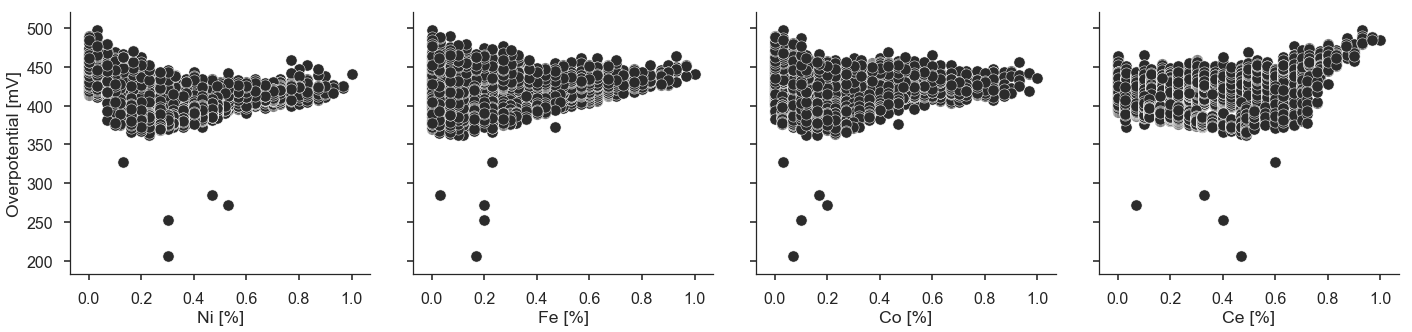

In [6]:
sns.set()
sns.set(style='ticks', context='poster', palette='Greys_r')

sns.pairplot(df_full, size=5, x_vars=['Ni [%]', 'Fe [%]', 'Co [%]', 'Ce [%]'], y_vars=['Overpotential [mV]'], markers='o')
plt.savefig('figure_04.png');

### Clustering and Dimensional reduction

Now a k-means clustering algorithm is used to find similarities in the dataset.

In [7]:
from sklearn.cluster import KMeans

In [8]:
%%time
k_ellbow = []
for E in range(50):
    E = E+1
    kmeans = KMeans(n_clusters=E)
    kmeans.fit(NiFeCoCe_full[:,0:4])
    score = kmeans.score(NiFeCoCe_full[:,0:4])
    k_ellbow.append(score)

CPU times: user 1min 3s, sys: 1.12 s, total: 1min 4s
Wall time: 33.4 s


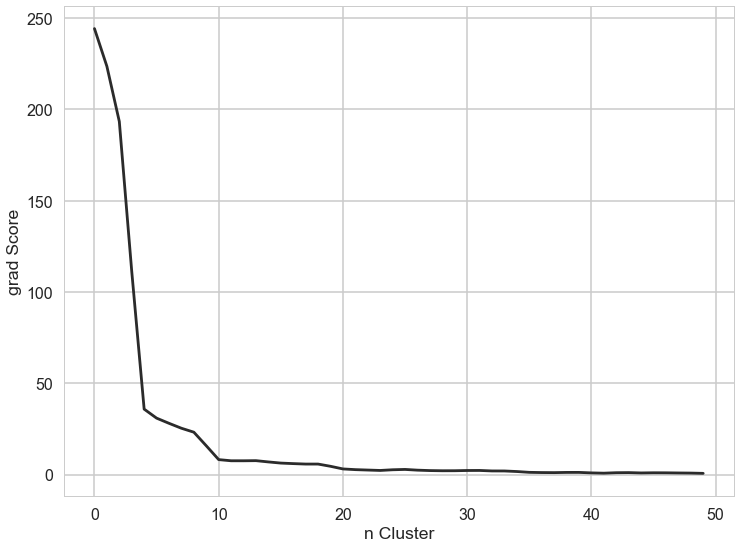

In [9]:
sns.set()
sns.set(style='whitegrid', context='poster', palette='Greys_r')
plt.figure(figsize=(12,9))

plt.plot(np.gradient(k_ellbow))
plt.xlabel('n Cluster')
plt.ylabel('grad Score')
plt.savefig('figure_05.png');

A cluster amount of ten is chosen.

In [10]:
k_cluster = KMeans(n_clusters=10)
k_cluster.fit(NiFeCoCe_full[:,0:4])
y_k_cluster = k_cluster.predict(NiFeCoCe_full[:,0:4])

Using the t-SNE algorithm for visualzation:

In [11]:
from sklearn.manifold import TSNE

In [12]:
%%time
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, init='pca')
tsne_result = tsne.fit_transform(NiFeCoCe_full[:,0:4])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6074 samples in 0.002s...
[t-SNE] Computed neighbors for 6074 samples in 0.133s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6074
[t-SNE] Computed conditional probabilities for sample 2000 / 6074
[t-SNE] Computed conditional probabilities for sample 3000 / 6074
[t-SNE] Computed conditional probabilities for sample 4000 / 6074
[t-SNE] Computed conditional probabilities for sample 5000 / 6074
[t-SNE] Computed conditional probabilities for sample 6000 / 6074
[t-SNE] Computed conditional probabilities for sample 6074 / 6074
[t-SNE] Mean sigma: 0.044124
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.388191
[t-SNE] KL divergence after 1000 iterations: 1.350374
CPU times: user 33.4 s, sys: 1.16 s, total: 34.6 s
Wall time: 34.3 s


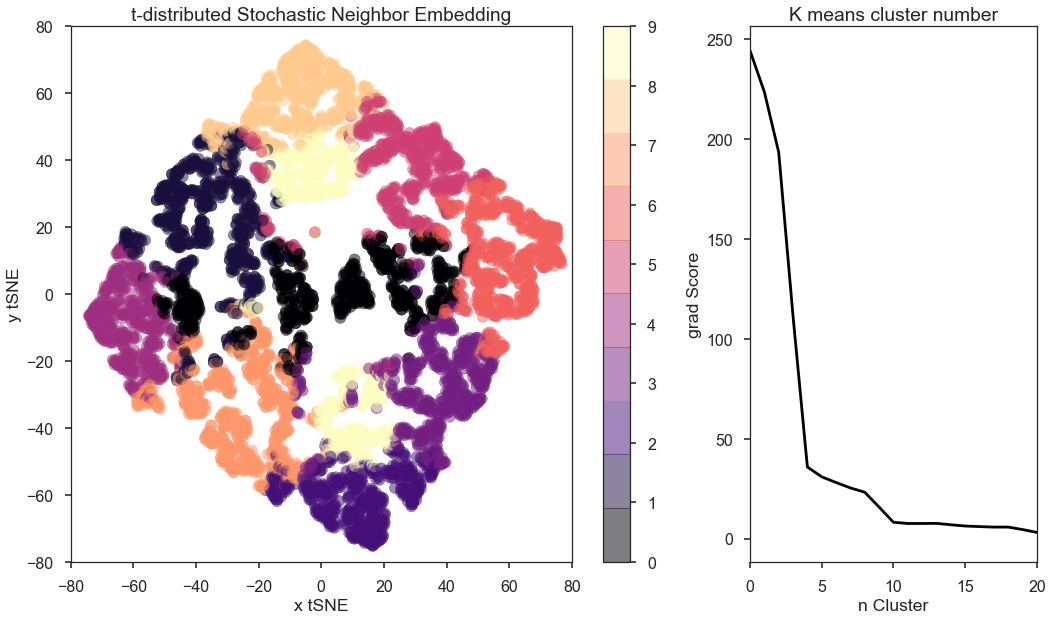

In [13]:
sns.set()
sns.set(style='ticks', context='poster')
plt.figure(figsize=(15,9))
grid = plt.GridSpec(1,3)
plt.subplot(grid[0,:2])
plt.xlim((-80,80))
plt.ylim((-80,80))

plt.title('t-distributed Stochastic Neighbor Embedding')
plt.xlabel('x tSNE')
plt.ylabel('y tSNE')

plt.scatter(tsne_result[:,0], tsne_result[:,1], c=y_k_cluster, marker='o',alpha=0.5, cmap=plt.cm.get_cmap('magma', 10))
plt.colorbar(ticks=np.arange(0,12))

plt.subplot(grid[0,2])
plt.xlim(0, 20)
plt.title('K means cluster number')
plt.xlabel('n Cluster')
plt.ylabel('grad Score')
plt.plot(np.gradient(k_ellbow), 'k')

plt.tight_layout()
plt.savefig('figure_11.png');

### Splitting into large and small OP

In [14]:
print(NiFeCoCe_full[0:5,:])
new_order = np.argsort(NiFeCoCe_full[:,-1])
print('---')
NiFeCoCe_new = NiFeCoCe_full[new_order]
print(NiFeCoCe_new)
print('---')
NiFeCoCe_small_OP = NiFeCoCe_new[NiFeCoCe_new[:,-1]<380]
NiFeCoCe_large_OP = NiFeCoCe_new[NiFeCoCe_new[:,-1]>=380]
print(NiFeCoCe_small_OP.shape)
print(NiFeCoCe_large_OP.shape)

[[1.00e+00 0.00e+00 0.00e+00 0.00e+00 4.41e+02]
 [9.69e-01 3.10e-02 0.00e+00 0.00e+00 4.26e+02]
 [9.69e-01 0.00e+00 3.10e-02 0.00e+00 4.23e+02]
 [9.29e-01 7.10e-02 0.00e+00 0.00e+00 4.20e+02]
 [9.29e-01 3.10e-02 3.10e-02 0.00e+00 4.22e+02]]
---
[[3.02e-01 1.69e-01 7.10e-02 4.71e-01 2.06e+02]
 [3.02e-01 2.00e-01 1.02e-01 4.00e-01 2.52e+02]
 [5.29e-01 2.00e-01 2.00e-01 7.10e-02 2.72e+02]
 ...
 [0.00e+00 3.10e-02 0.00e+00 9.69e-01 4.89e+02]
 [0.00e+00 7.10e-02 0.00e+00 9.29e-01 4.90e+02]
 [3.10e-02 0.00e+00 3.10e-02 9.29e-01 4.98e+02]]
---
(146, 5)
(5928, 5)


The datasets were splitted into train and test portions. Afterwards the the respective sub-datasets were recombined to yield the train and test dataset.

In [15]:
from sklearn.model_selection import train_test_split

X1_train, y1_test = train_test_split(NiFeCoCe_large_OP, test_size=0.3, random_state=42)
X2_train, y2_test = train_test_split(NiFeCoCe_small_OP, test_size=0.3, random_state=42)

print('---')
print(X1_train.shape, X2_train.shape)
print('---')
print(y1_test.shape, y2_test.shape)
print('---')

NiFeCoCe_train = np.vstack((X1_train, X2_train))
NiFeCoCe_test = np.vstack((y1_test, y2_test))

print(NiFeCoCe_train.shape)
print(NiFeCoCe_test.shape)

---
(4149, 5) (102, 5)
---
(1779, 5) (44, 5)
---
(4251, 5)
(1823, 5)


The dataset is shuffled to exclude any effects that are depended on the order of the data array.

In [16]:
np.random.seed(42)

order1 = np.argsort(np.random.random(NiFeCoCe_train[:,-1].shape))
order2 = np.argsort(np.random.random(NiFeCoCe_test[:,-1].shape))

NiFeCoCe_train = NiFeCoCe_train[order1]
NiFeCoCe_test = NiFeCoCe_test[order2]

Deviding the arrays into a training set and the corresponding labels and a testing data set with catalysts and the corresponding labels. 

In [17]:
train_data = NiFeCoCe_train[:,0:4]

train_label = NiFeCoCe_train[:,-1]/1000

test_data = NiFeCoCe_test[:,0:4]

test_label = NiFeCoCe_test[:,-1]/1000

Checking the shape of the datasets.

In [18]:
print(train_data.shape)
print(train_label.shape)
print('---')
print(test_data.shape)
print(test_label.shape)

(4251, 4)
(4251,)
---
(1823, 4)
(1823,)


## Neural Network approach

First **tensorflow** together with the **keras** API are imported to build an artificial neural network to model the catalyst performance with regard to overpotential. **Slight deviations in the graphs and output can be explained by the not fully deterninistic nature of the algorothms**.

In [19]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error

/Users/palkovits/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


A neural network is created with some layers. The input has four neurons, each of the hidden layers have six neurons, the output layer has one output as it is a regression problem. The input layer shape corresponds to the training data set with four columns standing for its atomic composition. ReLu is used as activation function for the neurons. RMSprop is used as optimizer and the network is trained for 500 epochs with the option of an earlies stop.

In [20]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [21]:
%%time

neuron_list = np.arange(2, 32, 2)
neuron_error = []

for neuron in neuron_list:

    model_opt = keras.Sequential()
    model_opt.add(keras.layers.Dense(neuron, activation=tf.nn.relu, input_shape=(train_data.shape[1],)))
    model_opt.add(keras.layers.Dense(neuron, activation=tf.nn.relu))
    model_opt.add(keras.layers.Dense(1))
    
    optimizer = tf.keras.optimizers.RMSprop(lr=0.001)
    
    model_opt.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
        
    model_opt.fit(train_data, train_label, epochs=500, validation_split=0.2, verbose=0, callbacks=[early_stop])
    
    predictions_ann = model_opt.predict(test_data).flatten()
    
    error_ann = np.sqrt(mean_squared_error(test_label,predictions_ann))
        
    neuron_error.append(error_ann)
    
    print('Neurons used =', neuron, 'Error =', error_ann, 'Epochs =', model_opt.history.epoch[-1])

print('Done!')

Neurons used = 2 Error = 0.01856280611965673 Epochs = 44
Neurons used = 4 Error = 0.018605274001609082 Epochs = 62
Neurons used = 6 Error = 0.011873231529843877 Epochs = 110
Neurons used = 8 Error = 0.012415475772492019 Epochs = 144
Neurons used = 10 Error = 0.01092820208554059 Epochs = 127
Neurons used = 12 Error = 0.012613262153550553 Epochs = 70
Neurons used = 14 Error = 0.010685419705291348 Epochs = 47
Neurons used = 16 Error = 0.013091204675860219 Epochs = 57
Neurons used = 18 Error = 0.013397689461993689 Epochs = 67
Neurons used = 20 Error = 0.014077659656221923 Epochs = 68
Neurons used = 22 Error = 0.010676545947443127 Epochs = 78
Neurons used = 24 Error = 0.01384752167112877 Epochs = 107
Neurons used = 26 Error = 0.014035391993341723 Epochs = 46
Neurons used = 28 Error = 0.010585378423432587 Epochs = 50
Neurons used = 30 Error = 0.010444924780710182 Epochs = 77
Done!
CPU times: user 5min 53s, sys: 35 s, total: 6min 28s
Wall time: 3min 4s


In [22]:
%%time
model = keras.Sequential()
model.add(keras.layers.Dense(6, activation=tf.nn.relu, input_shape=(train_data.shape[1],)))
model.add(keras.layers.Dense(6, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))
    
optimizer = tf.keras.optimizers.RMSprop(lr=0.001)
    
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    
model.summary()
    
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

model.fit(train_data, train_label, epochs=500, validation_split=0.2, verbose=0, callbacks=[early_stop]);

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 6)                 30        
_________________________________________________________________
dense_46 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 7         
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________
CPU times: user 29.6 s, sys: 2.88 s, total: 32.5 s
Wall time: 16.3 s


The model is saved for later use.

In [23]:
model.save('NiFeCoCe_full.h5')

The training behaviour can be monitored by plotting the loss function and the mean absolute error of the validation data set against the epochs. It shows that less than 100 epochs are needed to train the network to a resonable behaviour.

In [24]:
sns.set()
sns.set(style='ticks', context='poster', palette='magma')
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(model.history.epoch, np.array(model.history.history['loss']), 'k',label='Train set')
plt.plot(model.history.epoch, np.array(model.history.history['val_loss']), 'm', label='Validation set')
plt.legend()

plt.subplot(122)
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(model.history.epoch, np.array(model.history.history['mean_absolute_error']), 'k', label='Train set')
plt.plot(model.history.epoch, np.array(model.history.history['val_mean_absolute_error']), 'm', label='Validation set')
plt.legend()
         
plt.tight_layout()
plt.savefig('figure_13.png');

For the saved model is imported again for further use.

In [25]:
new_model = keras.models.load_model('NiFeCoCe_full.h5')

The model summary is the same like before.

In [26]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 6)                 30        
_________________________________________________________________
dense_46 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 7         
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


The network weights are printed here.

In [27]:
model.get_weights()

[array([[-0.95915824,  0.6166048 , -0.09115287, -0.25985596,  0.3241273 ,
          0.34337857],
        [ 0.34502843, -0.20786855, -0.1838931 ,  0.2014861 ,  0.48143598,
          0.41255593],
        [-0.2583506 , -0.5491296 , -0.20452811, -0.06734875,  0.68078774,
          0.31483975],
        [ 0.4654318 ,  0.24675049,  0.6506654 ,  0.7369401 ,  0.2067681 ,
          0.47954127]], dtype=float32),
 array([ 0.05725936, -0.14834979, -0.01669563,  0.01584323,  0.09518114,
        -0.06081179], dtype=float32),
 array([[-0.36535096,  0.35121024,  0.6685592 ,  0.09938309,  0.4284908 ,
         -0.47148037],
        [-0.7663507 , -0.4237659 ,  0.09766474,  0.4093844 ,  0.22728916,
          0.06955916],
        [ 0.4433853 ,  0.4666293 ,  0.61846167, -0.25406662,  0.2965575 ,
         -0.2641329 ],
        [-0.16417788,  0.32284227,  0.62495273,  0.06102458, -0.246317  ,
         -0.42524502],
        [-0.10826307, -0.6567396 , -0.08398739,  0.75610757,  0.12529953,
          0.27887586],

## Support vector regression

As next model the support vector regression is used. First the SVR algorithm is imported.

In [28]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

The a gridsearch for hyperparameters is carried out.

In [29]:
%%time
hyper_params = {'gamma':[1, 10, 100],
                'C':[1, 10, 100],
                'epsilon':[0.001, 0.01, 0.1]}

svr_tune = SVR(kernel='rbf')
g_search = GridSearchCV(svr_tune, hyper_params, cv=5, n_jobs=-1)
g_search.fit(train_data, train_label)

CPU times: user 16.4 s, sys: 212 ms, total: 16.7 s
Wall time: 14min 23s


In [30]:
print('Best Score', g_search.best_score_)
print('Best Estimator ', g_search.best_estimator_)

Best Score 0.7725784812944342
Best Estimator  SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=10,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [31]:
best_C = g_search.best_estimator_.C
best_gamma = g_search.best_estimator_.gamma
best_epsilon = g_search.best_estimator_.epsilon

The calculated best estimator is used for the following prediction.

In [32]:
svr_rbf = SVR(kernel='rbf', C=best_C, gamma=best_gamma, epsilon=best_epsilon)

In [33]:
y_svr = svr_rbf.fit(train_data, train_label)

## K-nearest neighbor regression

In a similar fashion a k-nearest neighbor regression is carried out on the datset. Here first the k-nearest neighbor algorithm is imported.

In [34]:
from sklearn import neighbors

To find the right amount of clusters the cluster amount is varied between 1 and 50. A score and the respective gradient is calculated.

In [35]:
rmse_val = []
for K in range(50):
    K = K+1
    model_knn = neighbors.KNeighborsRegressor(n_neighbors = K)
    model_knn.fit(train_data, train_label)
    predict_knn = model_knn.predict(test_data)
    error = np.sqrt(mean_squared_error(test_label,predict_knn))
    rmse_val.append(error)

The result is plotted as an "elbow curve".

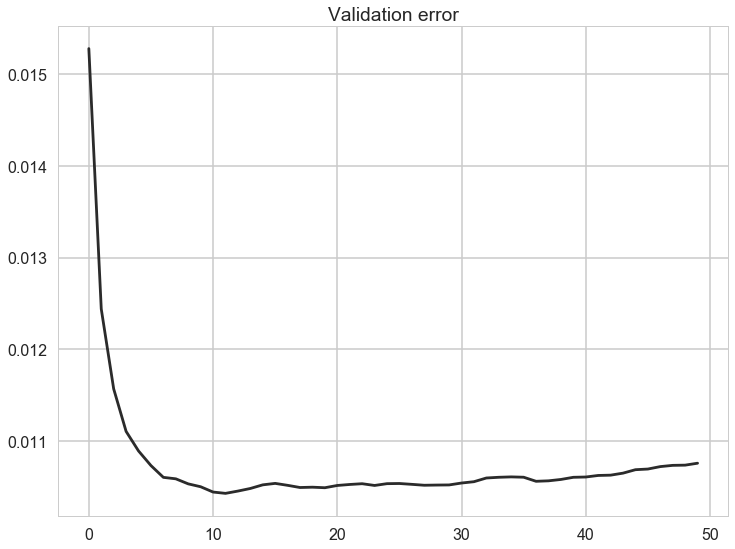

In [36]:
sns.set()
sns.set(style='whitegrid', context='poster', palette='Greys_r')
plt.figure(figsize=(12,9))

plt.title('Validation error')
plt.plot(rmse_val)
plt.savefig('figure_18.png');

This leads to aout 11 clusters.

In [37]:
print(np.argmin(rmse_val))
best_k = np.argmin(rmse_val)

11


This estimator is now used for the prediction.

In [38]:
model_knn = neighbors.KNeighborsRegressor(n_neighbors = best_k)
model_knn.fit(train_data, train_label)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=11, p=2,
          weights='uniform')

## Method overview

Now all three will be evaluated against each other. Predictions will be made for the train and test dataset but also an own dataset.

This array contains data from our own work on watersplitting.

In [39]:
own_data = np.array([(0.5, 0.0, 0.5, 0.0, 370),
                    (0.33, 0.0, 0.67, 0.0, 360),
                    (0.58, 0.0, 0.42, 0.0, 410),
                    (0.32, 0.0, 0.68, 0.0, 360),
                    (0.45, 0.0, 0.55, 0.0, 420),
                    (0.36, 0.0, 0.64, 0.0, 350)])

Prediction with the neural network:

In [40]:
train_predictions = model.predict(train_data).flatten()
test_predictions = model.predict(test_data).flatten()

predict_own_data = model.predict(own_data[:,0:4]).flatten()

Prediction with the SVR algorithm:

In [41]:
predict_svr_train = y_svr.predict(train_data)
predict_svr = y_svr.predict(test_data)

predict_own_svr = y_svr.predict(own_data[:,0:4])

Prediction with the KNN algorithm:

In [42]:
predict_knn_train=model_knn.predict(train_data)
predict_knn=model_knn.predict(test_data)

predict_own_knn=model_knn.predict(own_data[:,0:4])

Plotting the results of all methods in an overview:

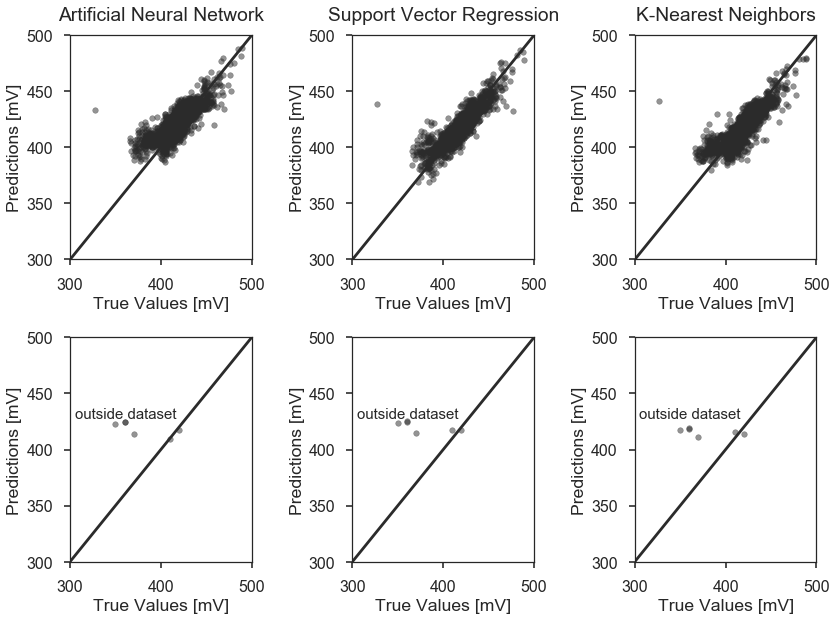

In [43]:
sns.set()
sns.set(style='ticks', context='poster', palette='Greys_r')
plt.figure(figsize=(12,9))

plt.subplot(231)
plt.xlim((300,500))
plt.ylim((300,500))
plt.title('Artificial Neural Network', pad=15)
plt.xlabel('True Values [mV]')
plt.ylabel('Predictions [mV]')
plt.scatter(test_label*1000, test_predictions*1000, marker='.', alpha=0.5)
plt.plot([-1000, 1000], [-1000, 1000])

plt.subplot(232)
plt.xlim((300,500))
plt.ylim((300,500))
plt.title('Support Vector Regression', pad=15)
plt.xlabel('True Values [mV]')
plt.ylabel('Predictions [mV]')
plt.scatter(test_label*1000, predict_svr*1000, marker='.', alpha=0.5)
plt.plot([-1000, 1000], [-1000, 1000])

plt.subplot(233)
plt.xlim((300,500))
plt.ylim((300,500))
plt.title('K-Nearest Neighbors', pad=15)
plt.xlabel('True Values [mV]')
plt.ylabel('Predictions [mV]')
plt.scatter(test_label*1000, predict_knn*1000, marker='.', alpha=0.5)

plt.plot([-1000, 1000], [-1000, 1000])

plt.subplot(234)
plt.xlim((300,500))
plt.ylim((300,500))
plt.xlabel('True Values [mV]')
plt.ylabel('Predictions [mV]')
plt.scatter(own_data[:,-1], predict_own_data*1000, marker='.', alpha=0.5)
plt.annotate('outside dataset', xy=(305,428), size=15)
plt.plot([-1000, 1000], [-1000, 1000])

plt.subplot(235)
plt.xlim((300,500))
plt.ylim((300,500))
plt.xlabel('True Values [mV]')
plt.ylabel('Predictions [mV]')
plt.scatter(own_data[:,-1], predict_own_svr*1000, marker='.', alpha=0.5)
plt.annotate('outside dataset', xy=(305,428), size=15)
plt.plot([-1000, 1000], [-1000, 1000])

plt.subplot(236)
plt.xlim((300,500))
plt.ylim((300,500))
plt.xlabel('True Values [mV]')
plt.ylabel('Predictions [mV]')
plt.scatter(own_data[:,-1], predict_own_knn*1000, marker='.', alpha=0.5)
plt.annotate('outside dataset', xy=(305,428), size=15)
plt.plot([-1000, 1000], [-1000, 1000])

plt.tight_layout()
plt.savefig('figure_22.png');

For further evaluations on the methods the mean squared error and the R2 score of the methods are calculated and evaluated against each other.

In [44]:
mse_ann = mean_squared_error(test_label,test_predictions)
mse_ann_train = mean_squared_error(train_label,train_predictions)

mse_svr = mean_squared_error(test_label,predict_svr)
mse_svr_train = mean_squared_error(train_label,predict_svr_train)

mse_knn = mean_squared_error(test_label,predict_knn)
mse_knn_train = mean_squared_error(train_label,predict_knn_train)

print(mse_ann_train)
print(mse_ann)

print(mse_svr_train)
print(mse_svr)

print(mse_knn_train)
print(mse_knn)

0.00012589125264808978
0.0001493594780803876
6.186841160403082e-05
9.455950483487392e-05
7.32704701470339e-05
0.00010903451761921809


In [45]:
from sklearn.metrics import r2_score

r2_ann_train = r2_score(train_label,train_predictions)
r2_ann = r2_score(test_label,test_predictions)

r2_svr_train = r2_score(train_label,predict_svr_train)
r2_svr = r2_score(test_label,predict_svr)

r2_knn_train = r2_score(train_label,predict_knn_train)
r2_knn = r2_score(test_label,predict_knn)


print(r2_ann_train)
print(r2_ann)

print(r2_svr_train)
print(r2_svr)

print(r2_knn_train)
print(r2_knn)

0.5883738657125986
0.5665328392577034
0.7977090975950708
0.7255718846318567
0.7604278315638664
0.6835628820966368


The metrics are finally plotted.

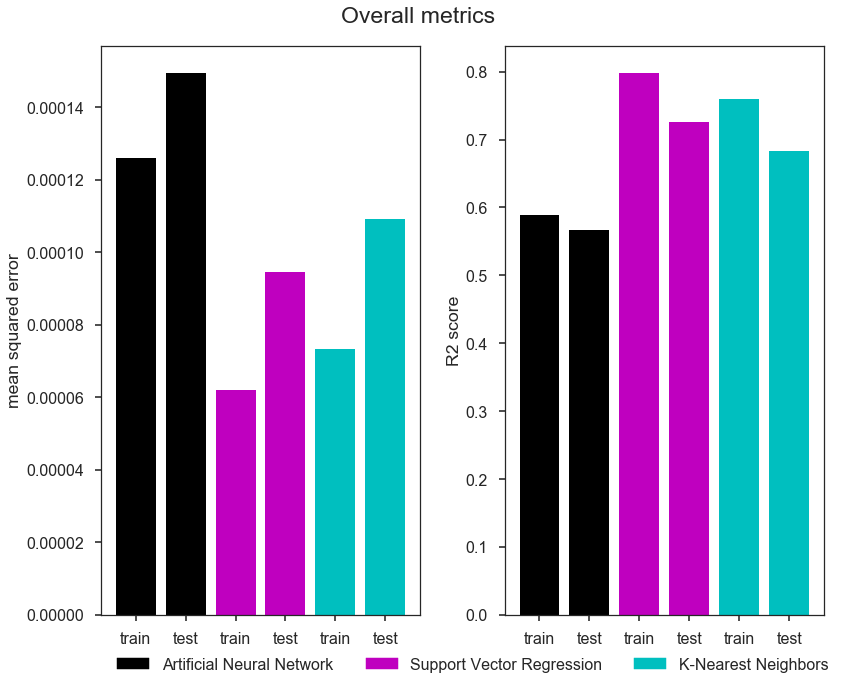

In [46]:
import matplotlib.patches as mpatches

sns.set()
sns.set(style='ticks', context='poster', palette='magma')

ann = mpatches.Patch(color='k', label='Artificial Neural Network')
svr = mpatches.Patch(color='m', label='Support Vector Regression')
knn = mpatches.Patch(color='c', label='K-Nearest Neighbors')

names = ['train', 'test', 'train', 'test', 'train', 'test']
pos = range(len(names))
colors = ['k', 'k', 'm', 'm', 'c', 'c']
rotation = 0

plt.figure(figsize=(12,9))
plt.suptitle('Overall metrics', y=1.02)
plt.subplot(121)
plt.bar(pos, [mse_ann_train, mse_ann, mse_svr_train, mse_svr,mse_knn_train, mse_knn], color=colors)
plt.xticks(pos, names,rotation=rotation)
plt.ylabel('mean squared error')

plt.subplot(122)
plt.bar(pos, [r2_ann_train,r2_ann, r2_svr_train, r2_svr,r2_knn_train, r2_knn], color=colors)
plt.xticks(pos, names, rotation=rotation)
plt.ylabel('R2 score')

plt.tight_layout()
plt.legend(loc='upper center', handles=[ann, svr, knn], ncol=3, bbox_to_anchor=(-0.1, -0.05))

plt.savefig('figure_24.png', bbox_inches='tight');